(numpy)=
# Arrays (`numpy`)

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 6)

*****

## Introduction

Arrays are fundamental when working with data. Many types of data are convenient to arrange and represent using arrays, and many types of data processing operations are facilitated through the use of arrays. For example:

* Digital images and spatial rasters are represented with arrays, possibly with spatial metadata (such as the Coordinate Reference System)
* Tables are represented as collections of one-dimensional arrays, having the same length, where each array represents a table column 

In this notebook we'll cover our first third-party package, named `numpy`. The `numpy` package deals with *arrays*. We are going to learn about methods for working with arrays, including:

* {ref}`creating-arrays`
* {ref}`subsetting-arrays`
* {ref}`numpy-vectorized-ops`
* {ref}`summarizing-array-values`
* {ref}`numpy-reading-from-file`
* {ref}`plotting-arrays` (using the `matplotlib` package)

In this notebook we'll work with the `numpy` package on its own. However, as we will see in later chapters, the `numpy` package is also the foundation and basis for most data analysis-related domains in Python, inclusing spatial data analysis. For example, table (see {ref}`pandas1`) and vector layer (see {ref}`geopandas1`) columns, as well as rasters (see {ref}`rasterio1`), are internally represented by `numpy` arrays. Therefore, although the material in this chapter may seem abstract at first, keep in mind that it is going to be practically applicable soon enough through all of the remaining chapters.

## What is `numpy`?

`numpy` (short for "numerical python") is a well-established Python package for scientific computing with arrays, and for working with data in general. The `numpy` package provides standardized data structures, functions, and operators for homogeous arrays, facilitating efficient computation and shorter code. Namely, thanks to the fact that a `numpy` array is uniform, in terms of data types, processing is much more efficient compared to a `list` (see {ref}`lists`). `numpy` also provides "vectorized" operators for arrays, which otherwise require using `for` loops (see {ref}`for-loops`) or list comprehension (see {ref}`list-comprehension`) when working with lists.

`numpy` is a core package in the data science ecosystem of Python, so it is worthwhile to learn it no matter what aspect of data science you are going to explore later on. `numpy` is the foundation for many other, more specialized, packages in Python, including most of the packages we learn about later on in this book: 

* `pandas` for working with tables (see {ref}`pandas1`)
* `geopandas` for working with vector layers (see {ref}`geopandas1`)
* `rasterio` and `richdem` for working with rasters (see {ref}`rasterio1`)

Assuming it is installed (see {ref}`installing-packages`, to start working with `numpy` we first need to import it (see {ref}`loading-packages`). By convention, `numpy` is imported as `np`:

In [3]:
import numpy as np

## What is an array?

An array is an ordered sequence of values, arranged in an n-dimensional structure. In this book, we are going to focus on the three most useful types of arrays:

* *One*-dimensional—A sequence of values, analogous to a "flat" (i.e., non-hierarchical) `list`
* *Two*-dimensional—A matrix, i.e., a collection of sequences, all of the same length, arranged into rows or columns
* *Three*-dimensional—A "cubic" array, i.e., a collection of matrices of the same size, arranged into layers

Keep in mind that an array can also be: 

* 0-dimensional—a single value, such as when extracting an individual element from an array (see {ref}`numpy-individual-values`), or 
* ≥4-dimensional—high-dimensional arrays, less useful for our purposes and in general

In spatial raster terminology (see {ref}`rasterio1`),

* a two-dimensional array corresponds to a *single*-band raster, and 
* a three-dimensional array corresponds to a *multi*-band raster.

In `numpy`, arrays are represented by a data type called `ndarray` (short for "N-dimensional array").

(creating-arrays)=
## Creating arrays

### Overview

An `ndarray` can be created in several ways, which we demonstrate in this section:

* From a `list` (see {ref}`numpy-from-list`)
* By repeating a sequence (see {ref}`np-tile` and {ref}`np-repeat`)
* By calculating a consecutive sequence (see {ref}`using-np-arange` and {ref}`np-linspace`) 

Later on we will demostrate that an array can also be imported from a file, such as a CSV file (see {ref}`numpy-reading-from-file`).

(numpy-from-list)=
### From `list`

In case we wish to manually specify all of the array values, the [`np.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) function can be used to convert a `list` into an array. For example, a flat `list` can be converted to a one-dimensional array, hereby named `a`, as follows:

In [4]:
a = np.array([3, 8, -2, 43, 12, 1, 8])
a

array([ 3,  8, -2, 43, 12,  1,  8])

A "nested" list, i.e., a list of lists, can be converted to a two-dimensional array, where the internal lists comprise the rows, hereby named `b`:

In [5]:
b = np.array([[1, 0, 0], [2, 1, 2], [3, 1, 0], [2, np.nan, 1]])
b

array([[ 1.,  0.,  0.],
       [ 2.,  1.,  2.],
       [ 3.,  1.,  0.],
       [ 2., nan,  1.]])

Note that array `b` contains a special value [`np.nan`](https://numpy.org/doc/stable/user/misc.html#ieee-754-floating-point-special-values), which represents "No Data", i.e., an unknown value in the array. We will elaborate on how `np.nan` values are treated in various operations, later on (see {ref}`numpy-nodata`). For now, you can get an impression of the `np.nan` behavior, and start getting used to the possibility of having missing values in a `numpy` array. 

Let us also create a three-dimensional array named `c`. Rather than typing all values manually, here we are using the `np.arange` function and the `.reshape` function, which we will explain later on (see {ref}`using-np-arange` and {ref}`numpy-general-reshaping`, respectively). What is important, for now, is that the resulting object is a *three-dimensional* array:

In [6]:
c = np.arange(1, 25).reshape((2, 3, 4))
c

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]])

Note that the `type` of `a`, `b` and `c`, is `ndarray`:

In [7]:
type(a), type(b), type(c)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

(np-tile)=
### Using `np.tile`

Repetitive arrays can be created using the [`np.tile`](https://numpy.org/doc/stable/reference/generated/numpy.tile.html) function, which accepts:

* `A`—A number, list, or array to repeat
* `reps`—How many times to repeat it?

For example:

In [8]:
np.tile(12, 7)  ## '12' three times

array([12, 12, 12, 12, 12, 12, 12])

In [9]:
np.tile([1, 2], 3)  ## '[1,2]' three times

array([1, 2, 1, 2, 1, 2])

In [10]:
np.tile(a, 2)  ## 'a' two times

array([ 3,  8, -2, 43, 12,  1,  8,  3,  8, -2, 43, 12,  1,  8])

(np-repeat)=
### Using `np.repeat`

There is a another function, named [`np.repeat`](https://numpy.org/doc/stable/reference/generated/numpy.repeat.html#numpy.repeat), for creating repetitive arrays. Unlike `np.tile`, the `np.repeat` function repeats each element consecutively and not the entire array (or list). Compare the following example with `np.tile([1,2],3)` (above):

In [11]:
np.repeat([1, 2], 3)

array([1, 1, 1, 2, 2, 2])

(using-np-arange)=
### Using `np.arange`

It is often useful to create sequential arrays. The [`np.arange`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) function can be used to create sequential arrays, given:

* `start`—The start value
* `stop`—The end value
* `step`—The *step* size

The `np.arange` function is very similar, in terms of its design, to the `range` function (see {ref}`range`).

For example, the following expression creates an array starting from `5`, ending before `12`, with step size `1.5`:

In [12]:
np.arange(5, 12, 1.5)

array([ 5. ,  6.5,  8. ,  9.5, 11. ])

The default value for `step` is `1`, as demonstrated in the following expression, where we omit `step`:

In [13]:
np.arange(5, 12)

array([ 5,  6,  7,  8,  9, 10, 11])

When passing a single argument to `np.arange`, that argument is treated it as `stop`, whereas the default `start` is `0` and the default `step` is `1`:

In [14]:
np.arange(12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

(np-linspace)=
### Using `np.linspace`

Another useful method to create sequential arrays is [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace) (short for "linear space") accepts three arguments:

* `start`—The start value
* `stop`—The end value
* `num`—Number of points (default is `50`)

The `np.linspace` function then returns evenly spaced points, in the interval specified by `start` and `stop`. The step size is automatically calculated to accommodate the specified number of points (default is `50`).

For example, the following expression creates a sequence of `9` equally spaced points, between `0` and `4`.

In [15]:
np.linspace(0, 4, 9)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])

```{note}
There are several other functions to facilitate creation of arrays, such as functions to create repetitive arrays:

* [`np.zeros`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html)—Array of given shape filled with `0`
* [`np.ones`](https://numpy.org/doc/stable/reference/generated/numpy.ones.html)—Array of given shape filled with `1`
* [`np.full`](https://numpy.org/doc/stable/reference/generated/numpy.full.html)—Array of given shape filled with user-specified value

and functions to create random number arrays, such as:

* [`np.random.random`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random.html)—Array of given shape filled with random numbers in the interval `[0.0, 1.0)`
* [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)—Array of given shape filled with random numbers from a normal distribution
* [`np.random.randint`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html)—Array of given shape filled with random integers in the specified interval
```

(array-dimensions)=
## Array dimensions

The most basic property of arrays is their *shape*: the size of each array dimension. This can be accessed using the [`.shape`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html) property. The returned object is a `tuple` (see {ref}`tuples`), with length according to the number of dimensions:

In [16]:
a.shape

(7,)

In [17]:
b.shape

(4, 3)

In [18]:
c.shape

(2, 3, 4)

A derived property of `.shape` is the number of dimensions [`.ndim`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.ndim.html), which is equal to the "length" of the `.shape` property:

In [19]:
a.ndim

1

In [20]:
b.ndim

2

In [21]:
c.ndim

3

Another derived property of `.shape` is the number of elements [`.size`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.size.html), which is equal to a multiplication of all dimension lengths:

In [22]:
a.size

7

In [23]:
b.size

12

In [24]:
c.size

24

At this point, you may wonder what is the reason for using an array rather than simply a `list`. This leads us to the main difference between arrays and lists: the fact that an array, unlike a `list`, is composed of values of the same *type*. This makes arrays more restrictive than lists, but also much more efficient in terms of storage size and computation speed. 

(numpy-data-types)=
## Data types

(numpy-checking-data-type)=
### Checking data type

As mentioned above, `ndarray` objects are composed of values of the same type. We can check the type of an existing array using the [`.dtype`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.dtype.html#numpy.ndarray.dtype) ("data type") property. For example:

In [25]:
a.dtype

dtype('int64')

In [26]:
b.dtype

dtype('float64')

The above printout means that `a` is an *integer* array, while `b` is a *float* array. You can also see that `numpy` accommodates more detailed distinction between data types than basic Python, with integer and float varieties according to specific precision. For example, `int64` and `float64` mean *64-bit* precision integer and float arrays, respectively ({ref}`numpy-types`).

The required data type can be specified when constructing an array, using the `dtype` parameter. The value can be specified using the respective object representing each data type (see {ref}`numpy-types`). For example:

In [27]:
x = np.array([1, 1, 1], dtype=np.float32)
x

array([1., 1., 1.], dtype=float32)

```{note}
The `int64` and `float64` data types in `numpy` are considered "standard". Therefore, when printing an array object, the data type specification appears for all data types except for those. Try printing `a` and `b` to see for yourself.
```

Commonly used data types in `numpy` are summarized in {numref}`numpy-types`. As you can see, there are many varieties of numeric types in `numpy`. This may seem confusing, compared to basic Python or other programming languages such as R, which have just one data type for integer and one for float. However, keep in mind that the purpose of having many specific data types is conserving memory and making calculations more efficient. In practice, `int64` and `float64` are most commonly used to represent `int` and `float`, respectively. 

```{table} numpy array data types
:name: numpy-types

| Data type | Description |
|---|---|
| `np.bool_` or `bool` | Boolean (`True` or `False`) stored as a byte
| `np.int_` or `int` | Platform-dependent default integer type (normally `int64` or `int32`)
| `np.int8` | Integer in a single byte (`-128` to `127`)
| `np.int16` | Integer in 16 bits (`-32768` to `32767`)
| `np.int32` | Integer in 32 bits (`-2147483648` to `2147483647`)
| `np.int64` | Integer in 64 bits (`-9223372036854775808` to `9223372036854775807`)
| `np.uint8` | Unsigned integer in 8 bits (`0` to `255`)
| `np.uint16` | Unsigned integer in 16 bits (`0` to `65535`)
| `np.uint32` | Unsigned integer in 32 bits (`0` to `4294967295`)
| `np.uint64` | Unsigned integer in in 64 bits (`0` to `18446744073709551615`)
| `np.float_` or `float` | Default float type, shorthand for `float64`
| `np.float16` | Half-precision (16 bit) float (`-65504` to `65504`)
| `np.float32` | Single-precision (32 bit) float (`1e-38` to `1e38`)
| `np.float64` | Double-precision (64 bit) float (`1e-308` to `1e308`)
```

`numpy` also supports creating arrays of "customized" types, and even arrays that do not conform to any of the built-in data types. The latter means that you can create an array where the elements are any type of Python object. Accordingly, the `dtype` of the resulting array will be `object`. 

For example, the following array of strings has `dtype` of `'<U5'`, namely "unicode string of length 5":

In [28]:
s = np.array(['John', 'James', 'Bob'])
s

array(['John', 'James', 'Bob'], dtype='<U5')

An array of dictionaries, however, results in `dtype` of `object`, because there is no built-in data type to represent an array of `dict` elements in `numpy`:

In [29]:
s = np.array([{'a': 1}, {'b': 2}])
s

array([{'a': 1}, {'b': 2}], dtype=object)

In practice, an array of type "object" implies that processing the array is going to employ "general" Python functions, rather than optimized `numpy` functions, which is less efficient.

(numpy-changing-data-type)=
### Changing data type

If necessary, an array can be transformed from one data type to another, using the [`.astype`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html#numpy.ndarray.astype) method. The argument of `.astype` is one of the `numpy` data types ({numref}`numpy-types`). For example, here is how we can transform array `a` from `int64` to `float64`:

In [30]:
a = a.astype(np.float64)
a

array([ 3.,  8., -2., 43., 12.,  1.,  8.])

Here is how we can transform `a` to `np.int8`:

In [31]:
a = a.astype(np.int8)
a

array([ 3,  8, -2, 43, 12,  1,  8], dtype=int8)

and here we go back to `int64`:

In [32]:
a = a.astype(np.int64)
a

array([ 3,  8, -2, 43, 12,  1,  8])

Keep in mind that: 

* We must choose a data range which encompasses the entire range of values in the array (see {numref}`numpy-types`). Otherwise, we get meaningless (random) values instead of those beyond the valid range.
* A `float` type must be used whenever the array contains `np.nan` values (see {ref}`no-data-representation`)

Also note that `numpy` defines special data types `np.int_` and `np.float_`, which refer to "default" `int` and `float` data types. These are platform dependent, but typically resolve to `np.int64` and `np.float64` ({ref}`numpy-types`). Furthermore, the standard Python types `int` and `float` ({ref}`numbers-int-float`) refer to those two `numpy` types, respectively. Therefore, for example, either of the three objects `np.int64`, `np.int_` and `int` can be passed to `.astype` in the above example, with identical result. In practice, we may want to use the shorter `int`:

In [33]:
a = a.astype(int)
a

array([ 3,  8, -2, 43, 12,  1,  8])

(subsetting-arrays)=
## Subsetting arrays

### Overview

Array subsets are created by passing indices, separated by commas (i.e., tuples of integers), inside square brackets (`[`). The number of indices needs to be in agreement with the number of dimensions. Remember that the order of dimensions (and indices) is:

* `array[rows,columns]`—for a *two*-dimensional array
* `array[layers,rows,columns]`—for a *three*-dimensional array

The indices start from `0`, like in other Python data sctructures (see {ref}`list-elements`).

(numpy-individual-values)=
### Individual values

For example, here is how we can get individual elements out of an array:

In [35]:
a[1]        ## 2nd element

8

In [36]:
b[1, 2]     ## Element in 2nd row, 3rd column

2.0

In [37]:
c[1, 0, 3]  ## Element in 2nd layer, 1st row, 4th column

16

When subsetting individual values from an array, we get a plain `numpy` value, such as an `int64` or `float64`. Technically speaking, the result is *simplified* to a zero-dimensional `numpy` array:

In [38]:
type(a[1])

numpy.int64

### Array slices

Any of the indices can be replaced with `:`, which means "return all subsets in that dimension". For example:

In [39]:
b[1, :]  ## 2nd row, all columns

array([2., 1., 2.])

In [40]:
b[:, 1]  ## 2nd column, all rows

array([ 0.,  1.,  1., nan])

In [41]:
c[:, 2, :]  ## 3rd row, all layers and all columns

array([[ 9, 10, 11, 12],
       [21, 22, 23, 24]])

We can also assign new values into an individual element, or a slice, of an array, in which case the respective elements are replaced. Try this for yourself to see how it works.

```{admonition} Exercise 04-a
:class: important
* How many dimensions does `c[1,2,:]` have? 
* What about `c[1,:,:]`? 
* Check your answers using an expression which returns the number of dimensions.
```

The `start:stop` notation which we learned about for `list` subsetting (see {ref}`list-subsets`) is applicable to `numpy` arrays too. For example:

In [42]:
b[:2, :]  ## 1st and 2nd rows

array([[1., 0., 0.],
       [2., 1., 2.]])

In [43]:
b[2:, :]  ## 3rd row and onward

array([[ 2.,  1.,  0.],
       [ 2., nan,  1.]])

In [44]:
b[1:3, :]  # 2nd and 3rd rows

array([[2., 1., 2.],
       [2., 1., 0.]])

When using individual *indices*, the result is simplified in terms of the number of dimensions. For example, `b[:,1]` is a one-dimensional array, with the values of one column of a two-dimensional array. When using *slices*, however, the result is never simplified, even the slice refers to just one element along the dimension. For example, compare the following methods to subset to second column of `b`: 

In [45]:
b[:, 1]    ## Subset 2nd column using individual index

array([ 0.,  1.,  1., nan])

In [46]:
b[:, 1:2]  ## Subset 2nd column using slice

array([[ 0.],
       [ 1.],
       [ 1.],
       [nan]])

Examples of subsetting a two-dimensional array are visualized in {numref}`numpy-subsetting`.

```{figure} images/figure_01_numpy_subsetting.svg
---
name: numpy-subsetting
width: 90%
---
Subsetting a two-dimensional `numpy` array
```

```{admonition} Exercise 04-b
:class: important
* Replace one of the values in the array `b` with a new value.
* Replace an entire *row* with a new value.
* Replace an entire *column* with a new value.
```

(numpy-references-and-copies)=
## Views and copies

An array is a *mutable* object. In agreement with the basic behavior of mutable objects, such as `list`s in Python (see {ref}`basics-mutability-and-copies`), this means that a copy of the original object is (by default) a reference to the same memory location. Any change we make in such a references is therefore "reflected" in both. 

In {ref}`basics-mutability-and-copies`, we have seen that assigning a `list` to another variable creates a reference to the same `list`. The same behavior takes places with `numpy` arrays. Moreover, and unlike `list`s, a *subset* of a `numpy` array is also a reference to the original (whereas a `list` subset is automatically copied). Therefore modifying an array subset is, too, reflected in the original array, unless we explicitly make an independent copy of the array and subset the copy. 

Let us demonstrate the behavior described in the last paragraph. Suppose that we take a subset with the 2<sup>nd</sup> row from array `b`: 

In [47]:
b_sub = b[1, :]
b_sub

array([2., 1., 2.])

and then replace one of the values with a different value, such as `999`:

In [48]:
b_sub[1] = 999

As expected, the subset `b_sub` now contains the new value:

In [49]:
b_sub

array([  2., 999.,   2.])

What may be unexpected, is that the original array `b`, where the subset comes from, is also updated:

In [50]:
b

array([[  1.,   0.,   0.],
       [  2., 999.,   2.],
       [  2.,   1.,   0.],
       [  2.,  nan,   1.]])

The reason for this behavior is that a subset is not a true copy of the underlying array. Instead, it can be thought of as a *view*, or reference, to the array, or to a subset of it. Any modification of the "view" modifies the original array as well. 

In case we are interested in a "real" copy, which is independent of the original, we must explicitly use the `.copy` method (see {ref}`basics-mutability-and-copies`). For example, let us return `b` to its original form (again through the view `b_sub`!):

In [51]:
b_sub[1] = 1
b

array([[ 1.,  0.,  0.],
       [ 2.,  1.,  2.],
       [ 2.,  1.,  0.],
       [ 2., nan,  1.]])

Now, let us create a subset which is a *copy* of `b`, and modify it:

In [52]:
b_sub2 = b[1, :].copy()
b_sub2[1] = 999

Again, the subset is modified as expected:

In [53]:
b_sub2

array([  2., 999.,   2.])

The original array `b`, however, is unchanged, since `b_sub2` is an independent copy:

In [54]:
b

array([[ 1.,  0.,  0.],
       [ 2.,  1.,  2.],
       [ 2.,  1.,  0.],
       [ 2., nan,  1.]])

Keep in mind that there are operations other than subsetting that return a "view", rather than a copy, such as:

* `.reshape` (see {ref}`numpy-general-reshaping`)
* `.T` (see {ref}`numpy-transposing`). 

(array-to-list)=
## `ndarray` to `list`

A `numpy` array can be converted to a `list` using the [`.tolist`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.tolist.html) method. This can be thought of as the opposite creating an array from a `list` with `np.array` (see {ref}`numpy-from-list`). For example:

In [55]:
b.tolist()

[[1.0, 0.0, 0.0], [2.0, 1.0, 2.0], [2.0, 1.0, 0.0], [2.0, nan, 1.0]]

This may be useful if we prefer to process our data using basic Python functions, rather than `numpy` functions and methods.

## Array reshaping

(numpy-general-reshaping)=
### General reshaping (`.reshape`)

Array *reshaping* means transferring the array values to an array with a different shape. Arrays can be reshaped using the [`.reshape`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.reshape.html) method, which accepts a `tuple` with the new shape. For example, the following expression transforms the one-dimensional array `a` with shape `(7,)` into a two-dimensional array with shape `(7,1)`, i.e., one column and seven rows:

In [56]:
a.reshape((7, 1))

array([[ 3],
       [ 8],
       [-2],
       [43],
       [12],
       [ 1],
       [ 8]])

The following expression transforms `b` into a two-dimensional array of a different shape, from shape `(4,3)` to shape `(2,6)`:

In [57]:
b.reshape((2, 6))

array([[ 1.,  0.,  0.,  2.,  1.,  2.],
       [ 2.,  1.,  0.,  2., nan,  1.]])

As mentioned above, `.reshape` returns a "view" of the original array (see {ref}`numpy-references-and-copies`).

```{note}
You can use `-1` for dimensions in `.reshape` to be calculated automatically, according to the other dimension(s) and the length of the data. For example, try `b.reshape((-1,6))` instead of the last expression.
```

```{note}
Another way of reshaping an array, specific to the case where we add a new dimension, is to use [`np.newaxis`](https://numpy.org/doc/stable/reference/constants.html#numpy.newaxis). For example, `a[:,np.newaxis]` and `a[np.newaxis,:]` transform `a` into a two-dimensional array with a new length-one dimension of columns or rows, respecively. Try these expressions in the console to see for yourself.
```

(numpy-to-one-dimensional)=
### To one-dimensional (`.flatten`)

A common reshaping operation is "collapsing" a multy-dimensional array into a one-dimensional array. This can be done using the [`.flatten`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html) method:

In [58]:
b.flatten()

array([ 1.,  0.,  0.,  2.,  1.,  2.,  2.,  1.,  0.,  2., nan,  1.])

"Flattening" can be useful when we need to treat all values of a two- (or three-) dimensional array as a single sequence, for example to calculate global statistics, or to display a histogram (see {ref}`numpy-hist`).

(numpy-transposing)=
### Transposing (`.T`)

Finally, it is often useful to transpose a two-dimensional array, that is, to turn array rows into columns and vice versa. The transposed array is accessible through the [`.T`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html) property:

In [59]:
b

array([[ 1.,  0.,  0.],
       [ 2.,  1.,  2.],
       [ 2.,  1.,  0.],
       [ 2., nan,  1.]])

In [60]:
b.T

array([[ 1.,  2.,  2.,  2.],
       [ 0.,  1.,  1., nan],
       [ 0.,  2.,  0.,  1.]])

Transposing is useful in situations when we need to apply a function that treats array rows and columns differently, such as when plotting (see {ref}`numpy-line-plot`).

As mentioned above, `.T` returns a "view" of the original array (see {ref}`numpy-references-and-copies`).

(numpy-vectorized-ops)=
## Vectorized operations

### Overview

Vectorized operations, also known as ["Universal functions"](https://numpy.org/doc/stable/reference/ufuncs.html) in `numpy` terminology, make it possible to apply the same operation on all elements of an array at once. Vectorized operations (discussed in this section) and summary functions (see {ref}`summarizing-array-values`), are two big advantages and motivations of using `numpy`, both in terms of shorter code and efficiency, compared to "basic" methods such as lists. Due to their efficient storage, vectorized operations on `numpy` arrays are much more efficient and fast than, say, a `for` loop or a list complehension repeatedly performing the same operation on all elements of a `list`. 

There are numerous built-in vectorized operators and functions in `numpy`, and there are methods to define new ones. The operations are pairwise, element-by-element. We can combine: 

* an array with another array (e.g., `b+b`), or
* an array with an individual number (e.g., `b+1`).

In the latter case, the number is automatically treated as an array with repeated values.

### Arithmetic operators

All arithmetic operators (see {ref}`arithmetic-operators`) are implemented as vectorized `numpy` operators. Let us take array `a` as an example:

In [61]:
a

array([ 3,  8, -2, 43, 12,  1,  8])

Here are a few examples of arithmetic array operations:

In [62]:
a + 1     ## Add 1 to elements of 'a'

array([ 4,  9, -1, 44, 13,  2,  9])

In [63]:
-a        ## Inverse of elements 'a'

array([ -3,  -8,   2, -43, -12,  -1,  -8])

In [64]:
a * a     ## Multiply each element of 'a' by itself (same as 'a**2')

array([   9,   64,    4, 1849,  144,    1,   64])

In [65]:
1000 - a  ## Subtract each element in 'a' from 1000

array([ 997,  992, 1002,  957,  988,  999,  992])

### Functions on each element

Numerous `numpy` functions are defined as vectorized functions, to perform an operation on each element, resulting in a new array of exactly the same shape as the input, containing the result. For example, the [`np.abs`](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html) function is used to calculate the absolute value of each element in an array:

In [66]:
np.abs(a)

array([ 3,  8,  2, 43, 12,  1,  8])

which is analogous to using basic `abs` function (see {ref}`functions`) on plain `int` or `float` values.

(numpy-conditional-operators)=
### `numpy` conditional operators

The conditional operators (see {ref}`conditions`) are also implemented as vectorized operators. For example:

In [67]:
a > 10       ## Is each element of 'a' greater than 10?

array([False, False, False,  True,  True, False, False])

In [68]:
a == abs(a)  ## Is each element of 'a' equal to its absolute value?

array([ True,  True, False,  True,  True,  True,  True])

Note that the result of conditional operations on an array is a *boolean* (see {ref}`boolean-values`) array, as evident when examining the `.dtype` property (see {ref}`numpy-checking-data-type`):

In [69]:
(a > 10).dtype

dtype('bool')

Boolean arrays can be negated with the `~` operator, or combined with `&` (and) and `|` (or) operators ({numref}`logical-ops-numpy`): 

* The `~` operator is analogous to `not` (see {numref}`logical-ops`), i.e., it negates a boolean array, replacing `True` with `False` and vice versa
* The `&` operator is analogous to `and` (see {numref}`logical-ops`)
* The `|` operator is analogous to `or` (see {numref}`logical-ops`)

Remember that `&`, `|`, and `~` should be used when working with arrays. The analogous `and`, `or`, and `not` operators which we covered earlier (see {numref}`logical-ops`), are applicable to entire objects, not arrays elements. 

```{table} Logical operators for numpy arrays
:name: logical-ops-numpy

| Operator | Meaning |
|---|---|
| [`&`](https://numpy.org/doc/stable/reference/generated/numpy.logical_and.html#numpy.logical_and) | And |
| [`\|`](https://numpy.org/doc/stable/reference/generated/numpy.logical_or.html#numpy.logical_or) | Or |
| [`~`](https://numpy.org/doc/stable/reference/generated/numpy.invert.html) | Not |
```

Let us demonstrate the `&`, `|`, and `~` operators through examples. First, suppose that we have two boolean arrays, `a>5` and `a<15`:

In [70]:
a > 5

array([False,  True, False,  True,  True, False,  True])

In [71]:
a < 15

array([ True,  True,  True, False,  True,  True,  True])

Here is how they can be combined using the `&` or the `|` operator. Beware that you must use parentheses around both sides of the expressions, since `&`, `|`, and `~` have higher precenence than comparison operators such as `<` and `>`:

In [72]:
(a > 5) & (a < 15)  ## Is each element of 'a' greater than 5 *and* smaller than 15?

array([False,  True, False, False,  True, False,  True])

In [73]:
(a > 5) | (a < 15)  ## Is each element of 'a' greater than 5 *or* smaller than 15?

array([ True,  True,  True,  True,  True,  True,  True])

Here is an example of the `~` operator in action, negating a boolean array:

In [74]:
~(a > 5)  ## Is each element of 'a' *not* greater than 5?

array([ True, False,  True, False, False,  True, False])

```{note}
Note that in all of the examples in this section which involve two arrays, the arrays had equal dimensions. `numpy` vectorized operations are, in fact, more general than that. In certain conditions, `numpy` can accommodate operations between two arrays with different dimensions. This is a powerful technique known as *broadcasting*. For more details, see <https://numpy.org/doc/stable/user/basics.broadcasting.html>.
```

When a boolean array is passed to an arithmetic operation, or function, `True` values are treated as `1` and `False` values are treated as `0`. The result is then a numeric array. For example, the boolean array `a>5`:

In [75]:
a > 5

array([False,  True, False,  True,  True, False,  True])

is automatically transformed to a numeric array of `0`'s and `1`'s when multiplied by `10`:

In [76]:
10 * (a > 5)

array([ 0, 10,  0, 10, 10,  0, 10])

(masking)=
## Masking

### What are masks?

Numpy arrays can be subsetted using corresponding boolean arrays, which are also known as *masks*. Masking is useful for extracting or modifying some of the values in an array—more specifically, those values which correspond to a specified condition. For example, we may want to: 

* extract the non-missing values in an array, or 
* replace all missing values with a new value, or
* delete (i.e., replace with "No Data") values that above a particular threshold (e.g., assuming they are measurement errors), and so on. 

Any boolean array with a corresponding shape can function as a mask. Typically, a mask is created using a conditional expression (see {ref}`numpy-conditional-operators`) on the original array itself. For example, given the array named `a`:

In [77]:
a

array([ 3,  8, -2, 43, 12,  1,  8])

The expression `a>10` creates a mask, referring to those elements of `a` which are greater than `10`:

In [78]:
a > 10

array([False, False, False,  True,  True, False, False])

(using-masks-for-subsetting)=
### Using masks for subsetting

When passed as an index inside square brackets (`[`), a mask can be used to filter the array, returning a subset with only those elements that correspond to `True`. For example:

In [79]:
a[a > 10]

array([43, 12])

Note that when subsetting two- or three-dimensional arrays using a mask, the original shape is not preserved. Instead, the selected values are "collected" into a one-dimensional array. For example:

In [80]:
b[b > 1]

array([2., 2., 2., 2.])

### Using masks for assignment

Assignment to a "masked" subset can be used to modify the corresponding subset in the original array. For example, the following expression replaces those values of `a` which are greater than `10`, with a new value `100`:

In [81]:
a[a > 10] = 100
a

array([  3,   8,  -2, 100, 100,   1,   8])

The following expression replaces values which are negative *or* equal to `3` with a new value `-99`. Again, note the mandatory parentheses.

In [82]:
a[(a < 0) | (a == 3)] = -99
a

array([-99,   8, -99, 100, 100,   1,   8])

Before we move on, let us get back to the original values in array `a`:

In [83]:
a = np.array([3, 8, -2, 43, 12, 1, 8])
a

array([ 3,  8, -2, 43, 12,  1,  8])

(summarizing-array-values)=
## Summarizing array values

### Overview

In addition to vectorized, or element-by-element, operations such as `np.abs` (see {ref}`numpy-vectorized-ops`), `numpy` also accommodates functions to *summarize* array values, such as `np.sum` to calculate the array sum. As we will see, there are several modes of operations for summary functions:

* A "global" summary (the default), such as `np.sum(x)` for the sum of all values in array `x`
* A summary for subsets along one or more dimensions—using `axis=A` or `axis=(A,B,...)`, where `A`, `B`, etc. are the dimensions being summarized (or "eliminated"), such as `np.sum(x,axis=0)` for column sums of a two-dimensional array `x`

The most useful function for summarizing array values, for the purposes of this book, are given in {numref}`numpy-summary-functions`. Note that some of the functions are defined in two ways: 

* as standalone functions (e.g., `np.sum`) 
* as array methods (e.g., `.sum`)

Both ways are identical, and it is just a matter of preference which one to use. However, standalone functions are accessible more universally:

* Some of the functions only have a standalone version (such as `np.median`)
* "No Data"-safe functions (such as `np.nanmean`, see {ref}`numpy-operations-with-nodata`) are only available through standalone functions

```{table} Commonly used functions to summarize array values in numpy
:name: numpy-summary-functions

| Operation | Function | Method | "No Data"-safe version |
|---|---|---|---|
| Sum | [`np.sum`](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) | [`.sum`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.sum.html) | [`np.nansum`](https://numpy.org/doc/stable/reference/generated/numpy.nansum.html) |
| Minimum | [`np.min`](https://numpy.org/doc/stable/reference/generated/numpy.min.html) | [`.min`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.min.html) | [`np.nanmin`](https://numpy.org/doc/stable/reference/generated/numpy.nanmin.html) |
| Maximum | [`np.max`](https://numpy.org/doc/stable/reference/generated/numpy.max.html) | [`.max`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.max.html) | [`np.nanmax`](https://numpy.org/doc/stable/reference/generated/numpy.nanmax.html) |
| Mean | [`np.mean`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) | [`.mean`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.mean.html) | [`np.nanmean`](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) |
| Median | [`np.median`](https://numpy.org/doc/stable/reference/generated/numpy.median.html) | - | [`np.nanmedian`](https://numpy.org/doc/stable/reference/generated/numpy.nanmedian.html) |
| Index of (first) minimum | [`np.argmin`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html) | [`.argmin`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argmin.html) | [`np.nanargmin`](https://numpy.org/doc/stable/reference/generated/numpy.nanargmin.html) |
| Index of (first) maximum | [`np.argmax`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) | [`.argmax`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argmax.html) | [`np.nanargmax`](https://numpy.org/doc/stable/reference/generated/numpy.nanargmax.html) |
| Is at least one element `True`? | [`np.any`](https://numpy.org/doc/stable/reference/generated/numpy.any.html) | [`.any`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.any.html#numpy.ndarray.any) | - |
| Are all elements `True`? | [`np.all`](https://numpy.org/doc/stable/reference/generated/numpy.all.html) | [`.all`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.all.html#numpy.ndarray.all) | - |
```

(numpy-global-summaries)=
### Global summaries

Unlike vectorized operations (see {ref}`numpy-vectorized-ops`), which are performed element-by-element, summary operations return a single result for the entire array (the default), or an array with results for subsets such as the rows and columns. In this section we discuss the former, known as *global* summaries. 

For example, the `np.sum` function can be used to calculate the global sum of all elements in an array:

In [84]:
np.sum(a)

73

The `np.min` and `np.max` functions return the minimum and maximum element, respectively:

In [85]:
np.min(a)

-2

In [86]:
np.max(a)

43

As mentioned above, most `numpy` summary functionshave "method" shortcuts to do the same using shorter code ({numref}`numpy-summary-functions`). For example, there is a `.max` method which does the same thing as the `np.max` function. For example:

In [87]:
a.max()  ## Shortcut to 'np.max(a)'

43

```{note}
Python has a built-in function called `sum`, which works on lists as well as `numpy` arrays. However, `sum` is much slower, and it is not tailored to `numpy` arrays, so it is not aware of array dimensions. The same applies to `min`, `max`, `any`, `all`, and other "base" Python functions. Make sure you are using the specialized `numpy` functions (such as `np.sum`) or methods (such as `.sum`) when working with `numpy`, to avoid unexpected results!
```

A common use case of global summary functions is to count `True` values in a boolean array, typically to find out the number of elements satisfying a given condition. Recall that the arithmetic operators, when applied on a boolean array, treats `True` values as `1` and `False` values as `0` (see {ref}`numpy-conditional-operators`). Therefore, it can be used for "counting" the number of `True` values. For example:

In [88]:
np.sum(a > 5)   ## How many elements of 'a' are greater than 5?

4

In [89]:
np.sum(a < 15)  ## How many elements of 'a' are smaller than 15?

6

Sometimes we are not interested in the exact number of `True` values, but rather to figure out if we have *at least one* `True` value, or if *all* values are `True`. The `.any` and `.all` methods used to reveal whether the array contains at least one `True`, or whether all of its elements are `True`, respectively. For example:

In [90]:
np.any(a > 5)  ## Is *any* of the elements of 'a' greater than 5?

True

In [91]:
np.all(a > 5)  ## Are *all* elements of 'a' greater than 5?

False

```{admonition} Exercise 04-c
:class: important
* The [`np.diff`](https://numpy.org/doc/stable/reference/generated/numpy.diff.html) function calculates consecutive differences between elements in an array. 
* Write an expression that, using `np.diff`, checks whether the elements of an array are in *increasing order*. 
* Test your expression using two arrays that are in increasing and non-increasing oderer, such as `np.array([2,5,8,9])` and `np.array([21,8,9])`. The returned values need to be `True`, and `False`, respectively.
```

(numpy-summaries-per-dimension-2d)=
### Summaries per dimension (2D)

As shown above, the default behavior of summary functions, such as `np.sum`, is to operate on all elements combined, resulting in a "global" summary (see {ref}`numpy-global-summaries`). Using the `axis` parameter, however, we can also apply the function on different dimensions, separately.

When referring to two-dimensional arrays, summary functions can be applied separately: 

* on each column (`axis=0`), or 
* on each row (`axis=1`) ({numref}`numpy-summarizing`).

```{figure} images/figure_02_numpy_summarizing_edited.svg
---
name: numpy-summarizing
width: 50%
---
Applying a function on each row, or on each column, of a two-dimensional `numpy` array
```

Let us demonstrate on the two-dimensional array `b`:

In [92]:
np.sum(b, axis=0)  ## Column sums

array([ 7., nan,  3.])

In [93]:
np.sum(b, axis=1)  ## Row sums

array([ 1.,  5.,  3., nan])

Note that whenever at least one "No Data" (`np.nan`) value is passed to `np.sum`, the result is also "No Data" ({numref}`numpy-summarizing`). To ignore `np.nan` values we may use the "No Data"-insensitive version of `.sum`, namely `np.nansum` (see {numref}`numpy-summary-functions`). We elaborate on dealing with "No Data" later on (see {ref}`numpy-nodata`).

The meaning of the `axis` parameter can be confusing. To get row-wise summaries (i.e., dimension `0`) we are actuially specifying the column dimension (`axis=1`), and vice versa. Here is a how you can remember the meaning of the `axis` parameter. With the `axis` parameter, we specify which dimension gets "eliminated" from the resulting array. Accordingly, 

* `axis=0` "eleminates" dimension `0` (rows), resulting in column-wise summaries
* `axis=1` "eliminates" dimension `1` (columns), resulting in row-wise summaries

```{admonition} Exercise 04-d
:class: important
* The [`np.argmin`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html) function returns the index of the minimum element ({numref}`numpy-summary-functions`). 
* What will be the result of `np.argmin(b,axis=0)`? 
* How about `np.argmin(b,axis=1)`? 
* Run the expressions to check your answer.
```

(numpy-summaries-per-dimension-3d)=
### Summaries per dimension (3D)

Let us now move on to the more complex case of summaries per dimension of *three*-dimensional arrays. Before we begin, recall that the order of dimensions in a three-dimensional array is `(layers,rows,columns)` (see {ref}`subsetting-arrays`).

For example, in array `c`, we have:

* Two "layers"
* Three rows
* Four columns

In [94]:
c.shape

(2, 3, 4)

First, we can get row-wise, column-wise, and "layer"-wise summaries, according to the same principle as with a two-dimensional array (see {ref}`numpy-summaries-per-dimension-2d`). We just need to "eliminate" two out of three dimensions, rather than one of two dimensions. In this case, the `axis` argument is a `tuple` of length two:

In [95]:
np.sum(c, axis=(1, 2))  ## "Layer" sums

array([ 78, 222])

In [96]:
np.sum(c, axis=(0, 2))  ## Row sums

array([ 68, 100, 132])

In [97]:
np.sum(c, axis=(0, 1))  ## Column sums

array([66, 72, 78, 84])

Second, eliminating one out of three dimensions results in summaries of the two remaining dimensions, which is a little more confusing. Overall, there are three possible combinations of dimension "pairs": 

* `axis=0`—*row-column* summaries
* `axis=1`—*column-layer* summaries 
* `axis=2`—*row-layer* summaries

 For our purposes in this book, the only useful combination is *row-column* summaries. In raster terminology, row-column summaries refer to "cell", or "pixel", summaries (see {ref}`summarizing-values`). To get row-column summaries, we eliminate the layer dimension:

In [98]:
np.sum(c, axis=0)  ## Row and column (i.e., "pixel") sums

array([[14, 16, 18, 20],
       [22, 24, 26, 28],
       [30, 32, 34, 36]])

(numpy-nodata)=
## Working with missing data (`numpy`)

(no-data-representation)=
### "No Data" representation

Missing values in a `numpy` array are typically represented using `np.nan` ("not a number"), which is a special type of a float value in `numpy`. For example:

In [99]:
x = np.array([1, np.nan, 3])
x

array([ 1., nan,  3.])

Due to the way that numbers are stored in [computer memory](https://en.wikipedia.org/wiki/NaN#Integer_NaN), `np.nan` can only be accommodated in `float` arrays. This leads to the inconvenience that `int` arrays cannot store "No Data" values in any straightforward way. Accordingly, for example, an `int` array that contains `np.nan` is automatically "promoted" to a `float` array, which is why, for instance, `x` turns out to be a `float` array:

In [100]:
x.dtype

dtype('float64')

(numpy-operations-with-nodata)=
### Operations with "No Data"

`np.nan` values are "contagious" in arithmetic operations. Namely, when one or more of the inputs is missing, the result of the operation is also going to be `np.nan`. For example, adding any number to `np.nan` results in `np.nan`, reflecting the fact that the sum is unknown:

In [101]:
np.nan + 4

nan

Similarly, a global sum of an array that contains one (or more) `np.nan` is also `np.nan`:

In [102]:
np.sum(x)

nan

We can use the special "No Data"-safe versions of summary functions ({numref}`numpy-summary-functions`) to apply the respective function on the *non-missing* elements of the array. For example, the following expression uses `np.nansum` to calculate the sum of non-missing elements in `x`, which is equal to `4`:

In [103]:
np.nansum(x)

4.0

```{admonition} Exercise 04-e
:class: important
* How can you insert a "No Data" (i.e., `np.nan`) value into the 1<sup>st</sup> layer, 2<sup>nd</sup> row, 3<sup>rd</sup> column of `c`? 
* Keep in mind that `int` arrays cannot contain `np.nan`!
```

Perhaps unintuitively, conditional operators with `np.nan` always return `False` (even though the result is actually unknown):

In [104]:
np.nan > 0

False

In [105]:
x > 0

array([ True, False,  True])

The exception is inequality (`!=`), which combined with `np.nan` always returns `True`:

In [106]:
np.nan != 10

True

The implication is that operations such as array subsetting based on conditions (see {ref}`using-masks-for-subsetting`), or counting the elements which satisfy a particular condition (see {ref}`numpy-global-summaries`), typically *ignore* `np.nan` values:

In [107]:
x[x > 0]

array([1., 3.])

In [108]:
np.sum(x > 0)

2

```{admonition} Exercise 04-f
:class: important
* Calculte "cell" sums in the modified array `c`, with and without ignoring "No Data" values.
```

(numpy-detecting-nodata)=
### Detecting "No Data" (`np.isnan`)

"No Data" values can be detected using the [`np.isnan`](https://numpy.org/doc/stable/reference/generated/numpy.isnan.html) function. Given an input array, `np.isnan` returns a corresponding boolean array, where `np.nan` are marked as `True`, and valid values are marked as `False`. For example:

In [109]:
np.isnan(x)

array([False,  True, False])

To detect values that are *not* missing, we can reverse the output of `np.isnan` using the negation operator `~` (see {numref}`logical-ops`):

In [110]:
~np.isnan(x)

array([ True, False,  True])

(numpy-reading-from-file)=
## Reading array from file

In addition to creating an array from an existing Python object such as a `list` (see {ref}`numpy-from-list`), or creating an array with consecutive or sequential values (see, for example, {ref}`using-np-arange`), we can read array data from files on disk. For example, the `numpy` package contains a function named [`np.genfromtxt`](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html), which can be used to read an array from a plain text file, such as a CSV file. 

The first argument of `np.genfromtxt` is the text file path, which is mandatory. The `np.genfromtxt` function has many other, optional, parameters, to accommodate reading from various text file formats, such as specifying the delimiting character, i.e., the character which is used to separate columns (`delimiter`), whether there are header rows, such as column names, to be skipped (`skip_header`), and so on. 

The following expression demonstrates reading array data from a CSV file without a header:

In [111]:
m = np.genfromtxt('data/carmel.csv', delimiter=',')
m

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

The `carmel.csv` matrix represents a Digital Elevation Model (DEM) of the area around Haifa. Note that: 

* `'data/carmel.csv'` is the file path to the `carmel.csv` file, which is included in the book sample data (see {ref}`sample-data`). Recall that this is a relative path (see {ref}`file-paths`) to the sub-directory named `data`. This means that, for the expression to work, you need to have the `carmel.csv` file inside a sub-directory named `data`, relative to the directory where the notebook is.
* This is a CSV file, which is why we use `delimiter=','` (open the file in a spreadsheet software, such as Excel, to get a sense of its contents).

Later on, we will learn how to turn this array into a spatial raster (see {ref}`creating-raster-from-array`).

To keep track of the calculations, it may be easier to start with a smaller array. The `'carmel_lowres.csv'` file also contains a DEM of the area around Haifa, but at much coarser resolution and therefore much smaller dimensions:

In [112]:
m = np.genfromtxt('data/carmel_lowres.csv', delimiter=',')
m

array([[ nan,  nan,  nan,  nan,  nan,   3.,   3.],
       [ nan,  nan,  nan,  nan,   4.,   6.,   4.],
       [ nan,  nan,  nan,  nan,   6.,   9.,   7.],
       [ nan,  61.,   9.,   4.,   9.,  10.,  16.],
       [ nan, 106., 132.,  11.,   6.,   6.,  27.],
       [ nan,  47., 254., 146.,   6.,   6.,  12.],
       [ nan,  31., 233., 340., 163.,  13.,  64.],
       [  3.,  39., 253., 383., 448., 152.,  39.],
       [  5.,  32., 199., 357., 414., 360.,  48.],
       [  7.,  49., 179., 307., 403., 370.,  55.]])

We will use the smaller array to demonstrate array plotting (see {ref}`plotting-arrays`). Afterwards, you can try the same operations with the larger array.

```{note}
Unlike in the examples in this section, the first row in CSV files is usually the *header*, specifying the column names. However, the header is irrelevant when importing the CSV file into a `numpy` array, as a `numpy` array does not have column (or row) names. Therefore, when reading a CSV file with a header, it should be skipped using `skip_header=1` (i.e., skip the first line) in `np.genfromtxt`.
```

```{note}
To *write* a `numpy` array to a CSV file, you can use the [`np.savetxt`](https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html) function, in an expression such as `np.savetxt('m.csv',m,fmt='%.6f',delimiter=',',header='x,y,z',comments='')`, where:

* `'m.csv'` is the CSV file name
* `m` is the array object to be writted
* `fmt='%.6f'` specifies the format, such as `'%.6f'` for floats with 6 digits
* `delimiter=','` specifies the CSV delimiter, i.e., a comma
* `header='x,y,z'` and `comments=''` should be used in case you want the first row in the CSV to contain a header with comma-separated column names (such as `x,y,z` for a CSV file with three columns named `x`, `y`, and `z`)
```

(plotting-arrays)=
## Plotting (`numpy`)

(matplotlib)=
### The `matplotlib` package

Sometimes visualizing array values can be more informative and instructive than any numeric summary. For example, we may wish to: 

* Summarize array values in the form of {ref}`numpy-hist`
* Display one- or two-dimensional array values in the form of {ref}`numpy-line-plot`
* Display two-dimensional array values in the form of {ref}`numpy-images`

The most established and widely used third-party Python package for data visualization, of arrays or other types of data, is `matplotlib`. To use `matplotlib`, we need to import it. More specifically, we import the `pyplot` sub-package (see {ref}`loading-packages`), which is the simpler interface of `matplotlib`, renaming it to `plt` for convenience:

In [113]:
import matplotlib.pyplot as plt

Visualization in Python is a large topic. Hereby we only introduce the most basic methods for a "first impression" of the data. Keep in mind that `matplotlib` is can be used in more advanced ways to produce customized publication-quality figures ({numref}`book-matplotlib`).

```{figure} images/book_matplotlib.png
---
name: book-matplotlib
---
`matplotlib` quick reference, from the [*Scientific Visualization: Python + Matplotlib*](https://github.com/rougier/scientific-visualization-book) book.
```

```{note}
[*Scientific Visualization: Python + Matplotlib*](https://github.com/rougier/scientific-visualization-book) is a recommended book about advanced plotting methods using the `matplotlib` package ({numref}`book-matplotlib`). It is can be downloaded as [PDF](https://hal.inria.fr/hal-03427242/document). The [official web page](https://matplotlib.org/) of `matplotlib` is also a good starting point to learn about the package.
```

(numpy-hist)=
### Histograms (`numpy`)

To make a histogram showing the distribution of a `numpy` array, we first need to "collect" them into one long on-dimensional array using the `flatten` method (see {ref}`numpy-to-one-dimensional`):

In [114]:
v = m.flatten()
v

array([ nan,  nan,  nan,  nan,  nan,   3.,   3.,  nan,  nan,  nan,  nan,
         4.,   6.,   4.,  nan,  nan,  nan,  nan,   6.,   9.,   7.,  nan,
        61.,   9.,   4.,   9.,  10.,  16.,  nan, 106., 132.,  11.,   6.,
         6.,  27.,  nan,  47., 254., 146.,   6.,   6.,  12.,  nan,  31.,
       233., 340., 163.,  13.,  64.,   3.,  39., 253., 383., 448., 152.,
        39.,   5.,  32., 199., 357., 414., 360.,  48.,   7.,  49., 179.,
       307., 403., 370.,  55.])

Then, the one-dimensional array can be passed to the [`plt.hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function to produce a histogram:

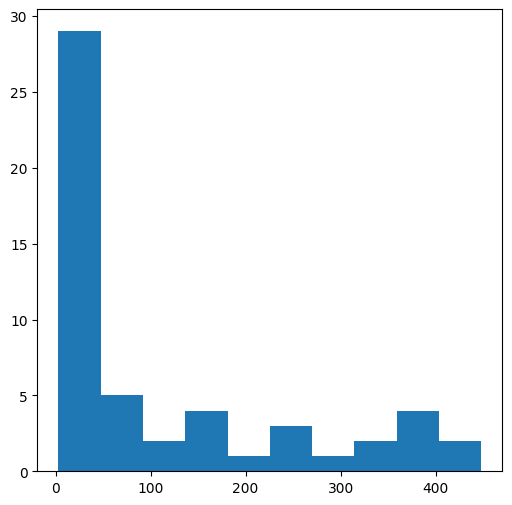

In [115]:
plt.hist(v);

```{note}
The `;` at the end of a `matplotlib` expression is an IPython [trick](https://stackoverflow.com/questions/25790062/how-to-hide-matplotlib-lines-line2d-in-ipython-notebook) to avoid printing textual data along with the plot. (Try removing it and re-running the cell to see the unwanted textual output.)
```

(numpy-line-plot)=
### Line plots (`numpy`)

A one-dimensional array can be passed to the [`plt.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) function to display the array values in a line plot, where the x-axis values are array indices, and y-axis values are the array values. For example, the `plt.plot` can be used to display a "profile" or "slice" of a given array, along a specific row:

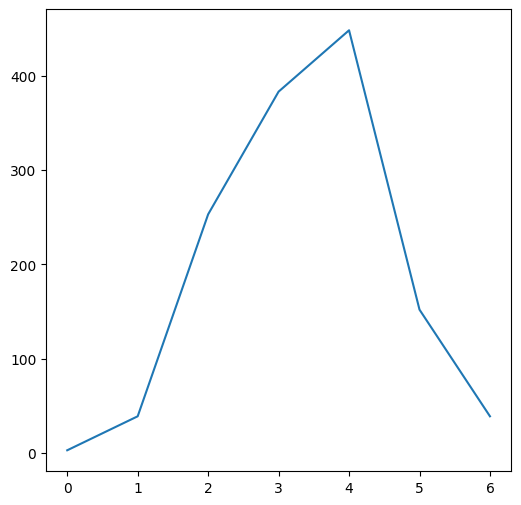

In [116]:
plt.plot(m[7, :]);

or along a specific column:

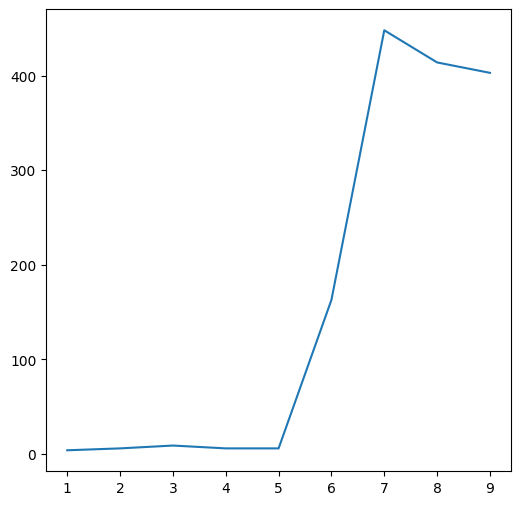

In [117]:
plt.plot(m[:, 4]);

A two-dimensional array can also be passed to `plt.plot`, in which case each array *column* is plotted as a separate series. For example, the following plot displays the seven columns in `m`, i.e., seven north-south elevation profiles: 

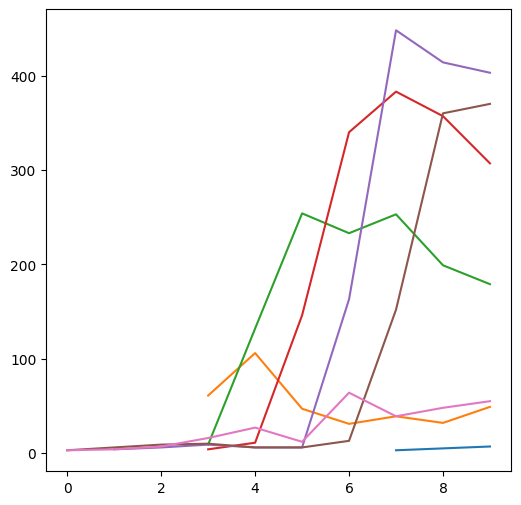

In [118]:
plt.plot(m);

(numpy-images)=
### Images (`numpy`)

To display the information of a two-dimensional array all at once, we can to encode the array values into a visual property, such as color. The result is an image, also known as a heatmap. The [`plt.imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) (short for "image show") function can be used to produce an image of a two-dimensional array:

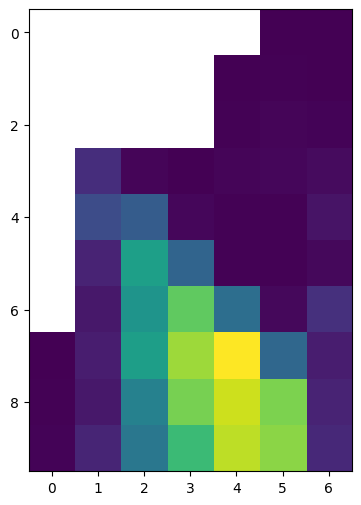

In [119]:
plt.imshow(m);

Since `m` is an array representing a Digital Elevation Model, this image is actually an elevation map of the area that this array represents.

## Beyond `numpy`

`numpy` is a fundamental Python package, with many other packages for data analysis, scientific computing, and statistics depending on it. Notable packages depending on `numpy` include:

* [`pandas`](https://pandas.pydata.org/)—For working with tables
* [`scipy`](https://scipy.org/)—For scientific computations
* [`scikit-learn`](https://scikit-learn.org/)—For statistical analysis and machine learning

We are going to cover `pandas` in the next two chapters (see {ref}`pandas1` and {ref}`pandas2`). Towards the end of the book we are going to breifly use `scipy` to apply a focal filter over a raster (see {ref}`focal-filtering`). 

The `scikit-learn` package is beyond the scope of this book, however there are many resources online (<https://scikit-learn.org/stable/>) and in print. In case you are going to do statistical analysis or machine learning in Python, `scikit-learn` is the recommended starting point.

(exercise-numpy)=
## More exercises

```{admonition} Exercise 04-g
:class: important
* Calculate a $10\times 10$ array which contains the multiplication table (as shown below). Hint: create a "template" array of the right shape (with uniform values such as `0`), then use a nested `for` loop (see {ref}`for-loops`) to populate it with the correct values.
* Next, make your code general enough so that it can produce a multiplication table of any size, specified by a parameter named `s` in the beginning of the code. For example, `s=10` should result in the $10\times 10$ multiplication table shown below, `s=5` should result in a $5\times 5$ multiplication table, and so on.

```text
array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])
```

```{admonition} Exercise 04-h
:class: important
* Read the `carmel.csv` file into a `numpy` array (see {ref}`numpy-reading-from-file`).
* Find the minimum, maximum, and average elevation value in the Carmel area, according to the `carmel.csv` array, excluding "No Data" values (answer: `-14.0`, `541.0`, and `124.06`, respectively).
* Calculate and plot a new array where "No Data" values are flagged by `1`, and any other value is flagged by `0` ({numref}`exercise-04-h1`).
* Calculate the *proportion* of missing values in the array (answer: `0.53`).
* Calculate and plot the average column and row "profiles" of the Carmel DEM, by calculating a 1D array of *column* means, and a 1D array of *row* means, respectively ({numref}`exercise-04-h2`).
```

```{glue:figure} exercise-04-h1
---
name: exercise-04-h1
---
Solution of exercise-04-h1: "No Data" values in `carmel.csv`
```

```{glue:figure} exercise-04-h2
---
name: exercise-04-h2
---
Solution of exercise-04-h2: Column and row means of `carmel.csv`
```

## Exercise solutions

In [120]:
from myst_nb import glue

### Exercise 04-g

In [1]:
import numpy as np
# Shape (e.g., 10 for '10*10')
s = 10
# Create "template"
x = np.tile(0, s**2)
x = x.reshape((s, s))
# Calculate i*j
for i in np.arange(x.shape[0]):
    for j in np.arange(x.shape[1]):
        x[i,j] = (i+1)*(j+1)
# Print
x

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

### Exercise 04-h

In [123]:
import matplotlib.pyplot as plt
m = np.genfromtxt('data/carmel.csv', delimiter=',')
np.nanmin(m)

-14.0

In [124]:
np.nanmax(m)

541.0

In [125]:
m1 = np.isnan(m)
plt.imshow(m1);

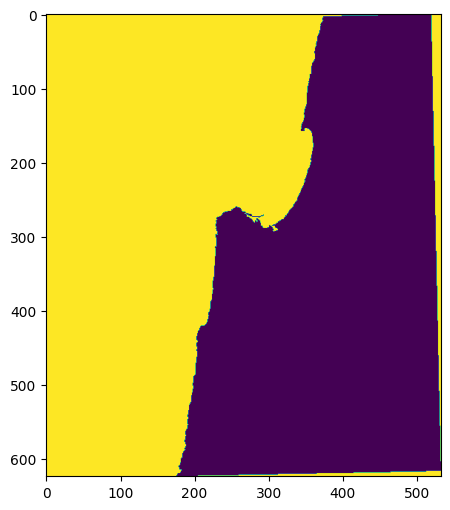

In [127]:
plot = plt.imshow(m1);
fig = plot.get_figure()
glue('exercise-04-h1', fig, display=False)

In [128]:
m1.mean()

0.5275713186125944

In [129]:
colmeans = np.nanmean(m, axis=0)
rowmeans = np.nanmean(m, axis=1)

/tmp/ipykernel_12605/4262640268.py:1: RuntimeWarning: Mean of empty slice
  colmeans = np.nanmean(m, axis=0)


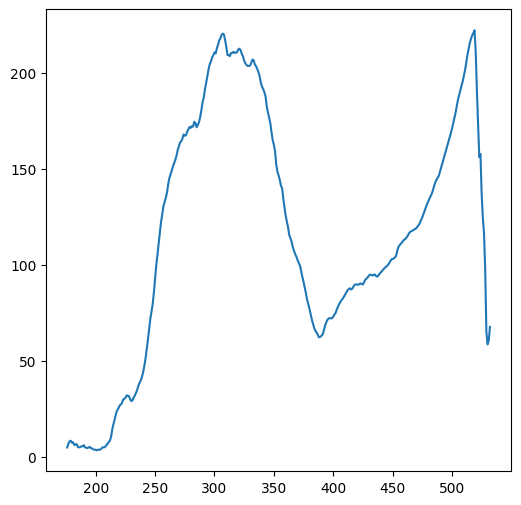

In [130]:
plt.plot(colmeans);

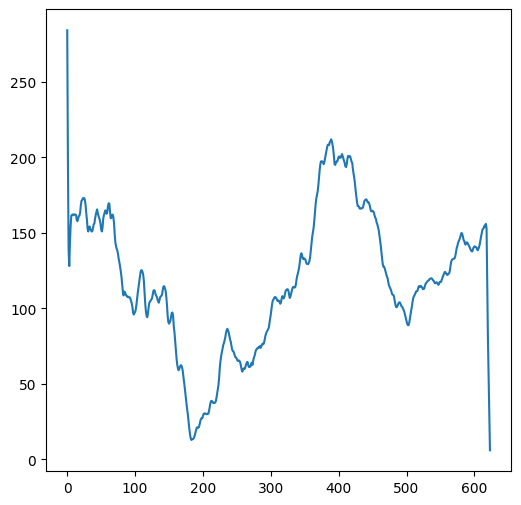

In [131]:
plt.plot(rowmeans);

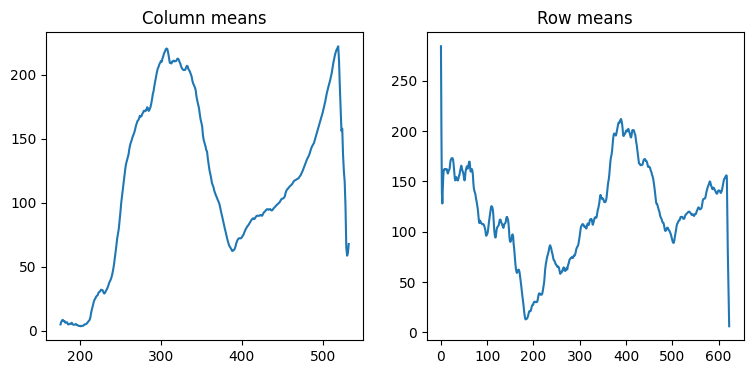

In [132]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
ax[0].plot(colmeans)
ax[0].set_title('Column means')
ax[1].plot(rowmeans)
ax[1].set_title('Row means')
glue('exercise-04-h2', fig, display=False)